# **Motivation:**

*What if we want to improve our Linear regression model?*

If you don't want to improve then well and good. Upto you. If we want to improve, then how to do that?

* One approach is to use higher order relationships of the features. 

If we have two features like x1 and x2 then by higher order relationship we mean:


  * Combining those features (interaction terms): x1x2 or x2x1
  * Making each feature higher order: $x_1^2$, $x_1^3$, $x_2^2$, $x_2^3$ etc.


## **When we'd know that we need to use higher order relationships of features?**

Answer: 

1. When you want to improve your linear regression model.

2. When you have features which are **non-linear features**. Means x and y don't have relationship of straight line between them. e.g.

1. y = log(x)

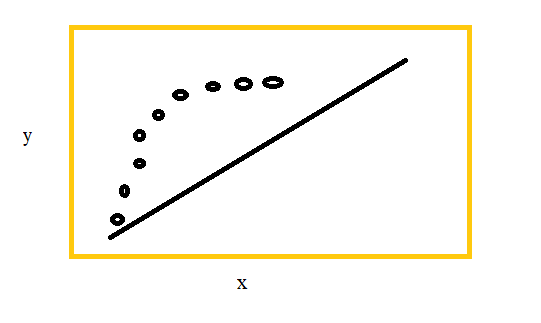

Straight line is not fitting the data of feature.

2. Making the feature x as higher order: 

  y = log ($x^2$)

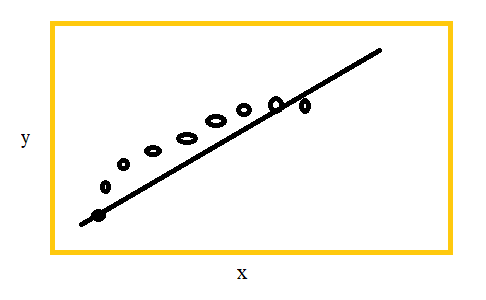

3. Making it more higher order:

  y = log ($x^3$)

  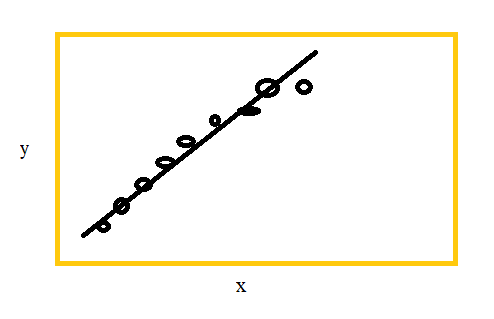


So, we saw that as we were increasing order of x, we were able to fit the x more better to the y. 

# **Interaction Terms:**

As we have seen this:

If we have two features like x1 and x2 then by higher order relationship we mean:


  * Combining those features (interaction terms): x1x2 or x2x1
  * Making each feature higher order: $x_1^2$, $x_1^3$, $x_2^2$, $x_2^3$ etc.

So, we have seen that how making feature higher order has affected the fitting to the output.

Now, lets see how combining features will affect. 

* Sometimes, the features are only significant when they are in sync with each other. In business world, this is called 'synergy' (combined action to get more advantage)

e.g. spending on TV advertisement is only better if we spend in radio too. 



One tool for it is to use 'PolynomialFeatures' in Sklearn which will gives us both:

1. Higher order features
2. Interaction terms
3. The bias (the value of 1.0, indicating y-intercept. Mostly, we dont use it)

# **Steps of getting polynomial features:**

1. Make instance of poly_converter using PolynomialFeatures algo of sklearn

2. Fit the dataset for polyconverter so it can check the range of dataset to convert features accordingly

3. Transform the features dataset to new features with higher order features and interaction terms

(We can even combine step 2 and 3 in one line. fit_transform(X))

4. Perform train-test split on new features

5. Fit the new features training data

6. Make predictions

7. Performance evaluation

# **------------------CODING---------------------------**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/content/sample_data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

# **1. Get polynomial features (Higher order features + Interaction terms)**

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter =  PolynomialFeatures(degree = 2, include_bias = False)

poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
newfeatures = poly_converter.transform(X)

We can do it in one line as:

newfeatures = poly_converter.fit_transform(X)

Let's check if we have successfully created polynomial features (higher order features + interaction terms):

In [12]:
X.shape

(200, 3)

In [13]:
newfeatures.shape

(200, 9)

It means now we have total of 9 features.

Woah ! It has created more features. Let's check

In [15]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [16]:
newfeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

So we can say here in newfeatures:

**Simple features:**

1. TV: 230.1

2. radio: 37.8 

3. newspaper: 69.2 

**Higher order features:**

4. TV: 230.1 --> 5.294601e+04 (degree 2)

5. radio: 37.8 --> 1.428840e+03 (degree 2)

6. newspaper: 69.2 -->  4.788640e+03 (degree 2)

**Interaction terms:**

7. TV x radio = 230.1 x 37.8 = 8.697780e+03

8. TV x newspaper = 230.1 x 69.2 = 1.592292e+04

9. radio x newspaper = 37.8 x 69.2 = 2.615760e+03

This is how 9 features are created from 3 features.

Superb!


# **2. Fit these new Polynomial Features for training and testing**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(newfeatures, y, test_size = 0.33, random_state = 101)

In [19]:
mymodel = LinearRegression()

In [20]:
mymodel.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions = mymodel.predict(X_test)

# **3. Performance Evaluation**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mean_absolute_error(y_test, predictions)

0.4842810535215478

In [26]:
np.sqrt(mean_squared_error(y_test, predictions))

0.6482912032533561

Woah!

Last time, by using 3 features, we got MAE as 1.24 and RMSE as 1.53.

But, by increasing features to 9, we got MAE as 0.48 and RMSE as 0.65. 

Amazing!

Now the model has performed extra-ordinary.